In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Import Dataset 
ds =pd.read_csv("Mall_Customers.csv")
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
ds.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [25]:
ds.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [26]:
# Taking inputs values for x

X= ds [['Annual Income (k$)','Spending Score (1-100)']]

In [27]:
# Importing model selection library (kmeans) and fitting for prediction of
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [30]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

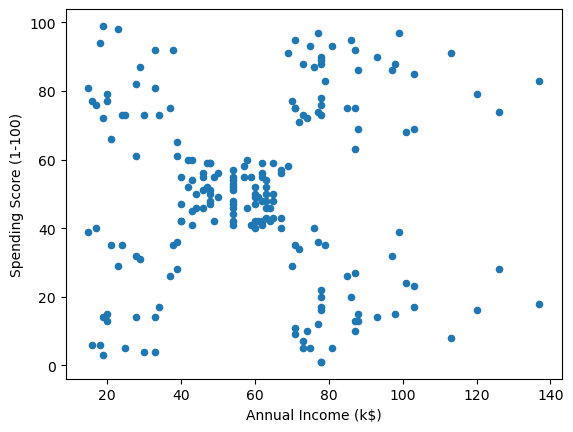

In [28]:
# Ploting Variables for x
X.plot(kind = 'scatter', x = "Annual Income (k$)",y = "Spending Score (1-100)" )
plt.show()

In [35]:
# Making Cluster Table
result=pd.DataFrame(data=y_kmeans, columns = ['Cluster'])
result

,Cluster
0,4
1,2
2,4
3,2
4,4
...,...
195,1
196,3
197,1
198,3


In [39]:
# i want to predict for my input
kmeans.predict([[30,70]])

array([2])

In [42]:
# Join x data and cluster type data
data = pd.concat([X,result],axis=1)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

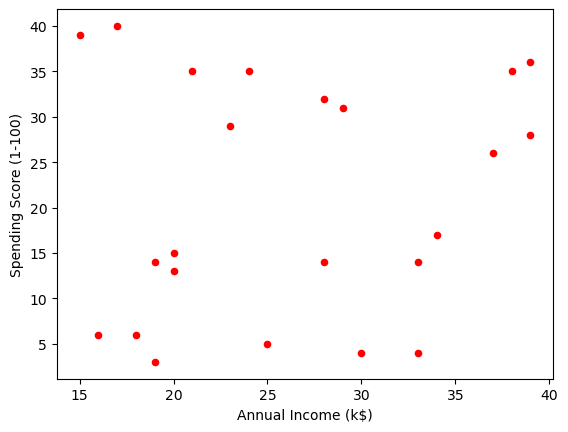

In [45]:
# Getting specific cluster list visulization
data[data['Cluster']==4].plot(kind ='scatter',x = "Annual Income (k$)",y = "Spending Score (1-100)" , color ='red')

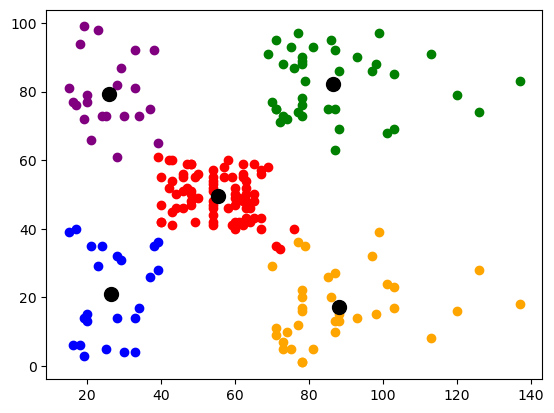

In [54]:
colors = ['red', 'green', 'purple', 'orange', 'blue']
for i in range(0, 5):
    cluster = data[data['Cluster']==i]
    plt.scatter(cluster["Annual Income (k$)"], cluster["Spending Score (1-100)"], color=colors[i])
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], color='black', s=100)

In [53]:
### user input
print("enter new customer data to predict cluster:")

income= float(input("enter annual income(k$):"))
score = float(input("enter spending score(1-100):"))

#predict the cluster for new customer
predicted_cluster =kmeans.predict([[income,score]])[0]
print(f"the customer belongs to cluster{predicted_cluster}")

enter new customer data to predict cluster:


enter annual income(k$): 30
enter spending score(1-100): 70


the customer belongs to cluster2
